In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle
from sklearn.model_selection import cross_val_score

In [2]:
train = pd.read_excel("Data_Train.xlsx")
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## EDA

In [3]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [4]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train.dropna(inplace = True)

Since data and month are important in the case of price prediciton. We can create new column for those.

In [6]:
train["Date"] = pd.to_datetime(train.Date_of_Journey, format="%d/%m/%Y").dt.day
train["Month"] = pd.to_datetime(train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

now we can drop the date of journey column.

In [7]:
train = train.drop(["Date_of_Journey"], axis = 1)

The time given in the departure column and arrival column, we can find the hour of the day.

In [8]:
train["Dep_hour"] = pd.to_datetime(train["Dep_Time"]).dt.hour
train["Dep_min"] = pd.to_datetime(train["Dep_Time"]).dt.minute

In [9]:
train = train.drop(["Dep_Time"], axis = 1)

Similarly for the arival time.

In [10]:
train["Arr_hour"] = pd.to_datetime(train["Arrival_Time"]).dt.hour
train["Arr_min"] = pd.to_datetime(train["Arrival_Time"]).dt.minute
train = train.drop(["Arrival_Time"], axis = 1)

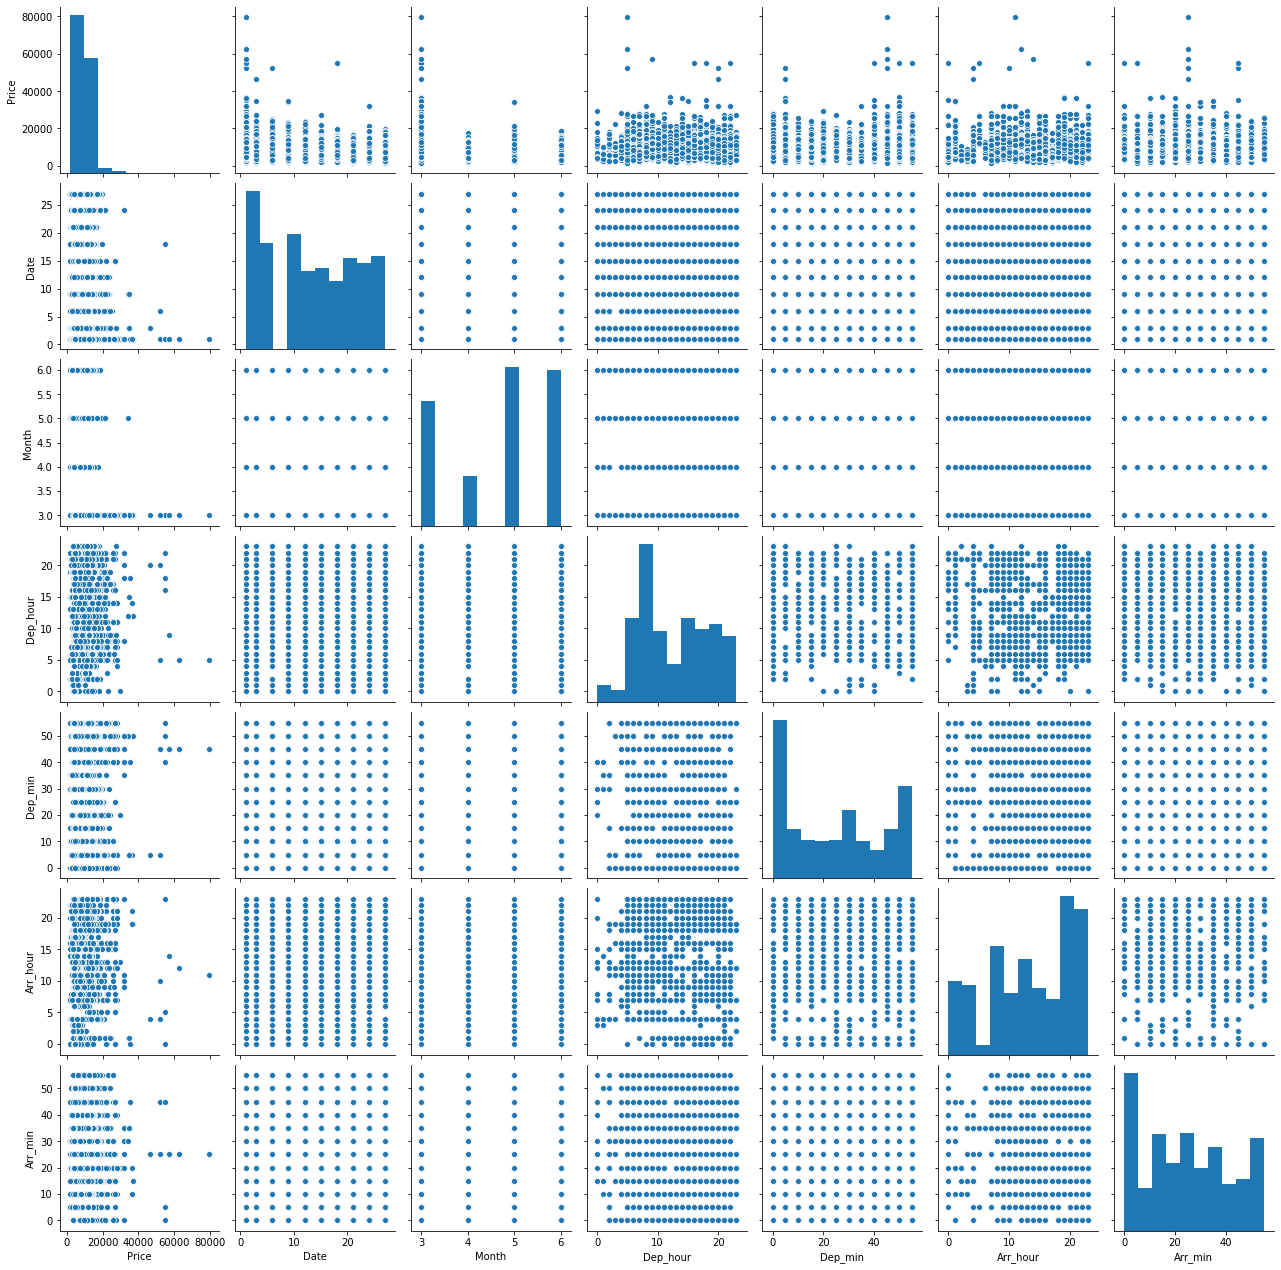

In [11]:
sns.pairplot(train)
plt.show()

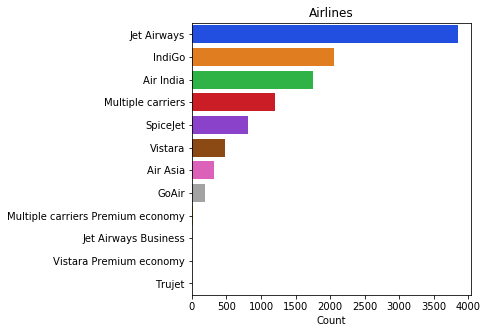

In [12]:
Airlines = train['Airline'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot( Airlines.values,Airlines.index, palette='bright')
plt.title('Airlines')
plt.xlabel('Count')
plt.style.use('bmh')
plt.tick_params(labelsize=10)
plt.show()

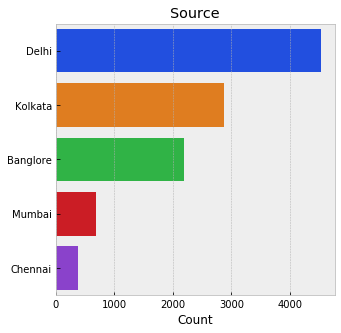

In [13]:
Source = train['Source'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot( Source.values,Source.index, palette='bright')
plt.title('Source')
plt.xlabel('Count')
plt.style.use('bmh')
plt.tick_params(labelsize=10)
plt.show()

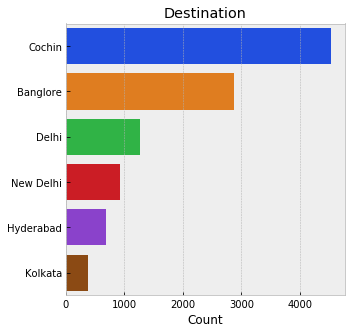

In [14]:
Destination = train['Destination'].value_counts()

plt.figure(figsize=(5, 5))
plt.tick_params(labelsize=10)
sns.barplot( Destination.values,Destination.index, palette='bright')
plt.title('Destination')
plt.xlabel('Count')
plt.style.use('bmh')
plt.tick_params(labelsize=10)
plt.show()

In [15]:
train.drop(["Additional_Info", "Route", "Duration"], axis=1, inplace = True)

In [16]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35


In [17]:
train = train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4})

### Label encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
feat = ["Airline", "Source", "Destination"]
for column in feat:
    encoder = LabelEncoder()
    train[column] = encoder.fit_transform(train[column])

In [21]:
train.head()

,Airline,Source,Destination,Total_Stops,Price,Date,Month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,3,0,5,0,3897,24,3,22,20,1,10
1,1,3,0,2,7662,1,5,5,50,13,15
2,4,2,1,2,13882,9,6,9,25,4,25
3,3,3,0,1,6218,12,5,18,5,23,30
4,3,0,5,1,13302,1,3,16,50,21,35


### splitting the features and target

In [22]:
X = train.drop(["Price"], axis = 1)
y = train["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)
score = LR.score(X_test, y_test)
score

0.44675514916367665

In [26]:
scores = cross_val_score(LR, X_train, y_train, scoring = "r2", cv = 5)
scores

array([0.38527331, 0.39283122, 0.44307827, 0.46288587, 0.42712595])

## Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
score = DT.score(X_test, y_test)
score

0.7770819146355844

In [28]:
scores = cross_val_score(DT, X_train, y_train, scoring = "r2", cv = 5)
scores

array([0.67642598, 0.72364037, 0.69059288, 0.69458957, 0.77812917])

## Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators = 80)
RF.fit(X_train, y_train)
accuracy = RF.score(X_test, y_test)
accuracy

0.8318091724625213

In [33]:
scores = cross_val_score(DT, X_train, y_train, scoring = "r2", cv = 5)
scores

array([0.65839521, 0.6219497 , 0.69452952, 0.66352996, 0.7797092 ])

## Gradient Boost

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(n_estimators = 80)
GB.fit(X_train, y_train)
accuracy = GB.score(X_test, y_test)
accuracy

0.7648292699183116

In [34]:
scores = cross_val_score(GB, X_train, y_train, scoring = "r2", cv = 5)
scores

array([0.72006096, 0.74378084, 0.77150262, 0.74399664, 0.7877329 ])

In [36]:
from sklearn.model_selection import GridSearchCV
param_dict = {
    "n_estimators":range(60,100, 10),
    "max_depth":range(5,10),
    "min_samples_split":range(2,5),
    "min_samples_leaf":range(1,5)
}
grid_GB = GridSearchCV(GB,
                      param_grid=param_dict,
                      cv = 5,
                      verbose = 1,
                      n_jobs = -1)
grid_GB.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(n_estimators=80),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 5),
                         'n_estimators': range(60, 100, 10)},
             verbose=1)

In [38]:
accuracy = grid_GB.score(X_test, y_test)
accuracy

0.8561795513986332

## Best model

Best model comes out to be the gradient boost with accuracy of 86%. We can save this model as a pkl file.

In [ ]:
pickle.dump(LR, open("LR_model.pkl", 'wb'))